In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This notebook shows how to use the generic Q1+ dataset wrapper for [EOTDL](https://www.eotdl.com/).

In [96]:
from pytorch_eo.datasets import EOTDLDataset

ds = EOTDLDataset("EuroSAT-Q1-small", batch_size=25, force=False, verbose=True) 

ds.setup()

Dataset `EuroSAT-Q1-small v1` already exists at data/EuroSAT-Q1-small/v1. To force download, use force=True or -f in the CLI.


The `force` argument will downlaod the dataset even if it is already downloaded.

In [97]:
ds.df

,image,label,class
0,data/EuroSAT-Q1-small/v1/assets/Industrial_100...,6,PermanentCrop
1,data/EuroSAT-Q1-small/v1/assets/Industrial_10.tif,9,SeaLake
2,data/EuroSAT-Q1-small/v1/assets/Highway_1.tif,5,Pasture
3,data/EuroSAT-Q1-small/v1/assets/AnnualCrop_1.tif,7,Residential
4,data/EuroSAT-Q1-small/v1/assets/Pasture_1.tif,6,PermanentCrop
...,...,...,...
95,data/EuroSAT-Q1-small/v1/assets/River_100.tif,2,HerbaceousVegetation
96,data/EuroSAT-Q1-small/v1/assets/Highway_10.tif,8,River
97,data/EuroSAT-Q1-small/v1/assets/Pasture_1001.tif,9,SeaLake
98,data/EuroSAT-Q1-small/v1/assets/River_1006.tif,7,Residential


In [98]:
ds.classes

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

The wrapper will use the STAC metadata to generate the appropriate `Dataset` object. In this example, it is a classification dataset with Sentinel 2 images and one label per image.

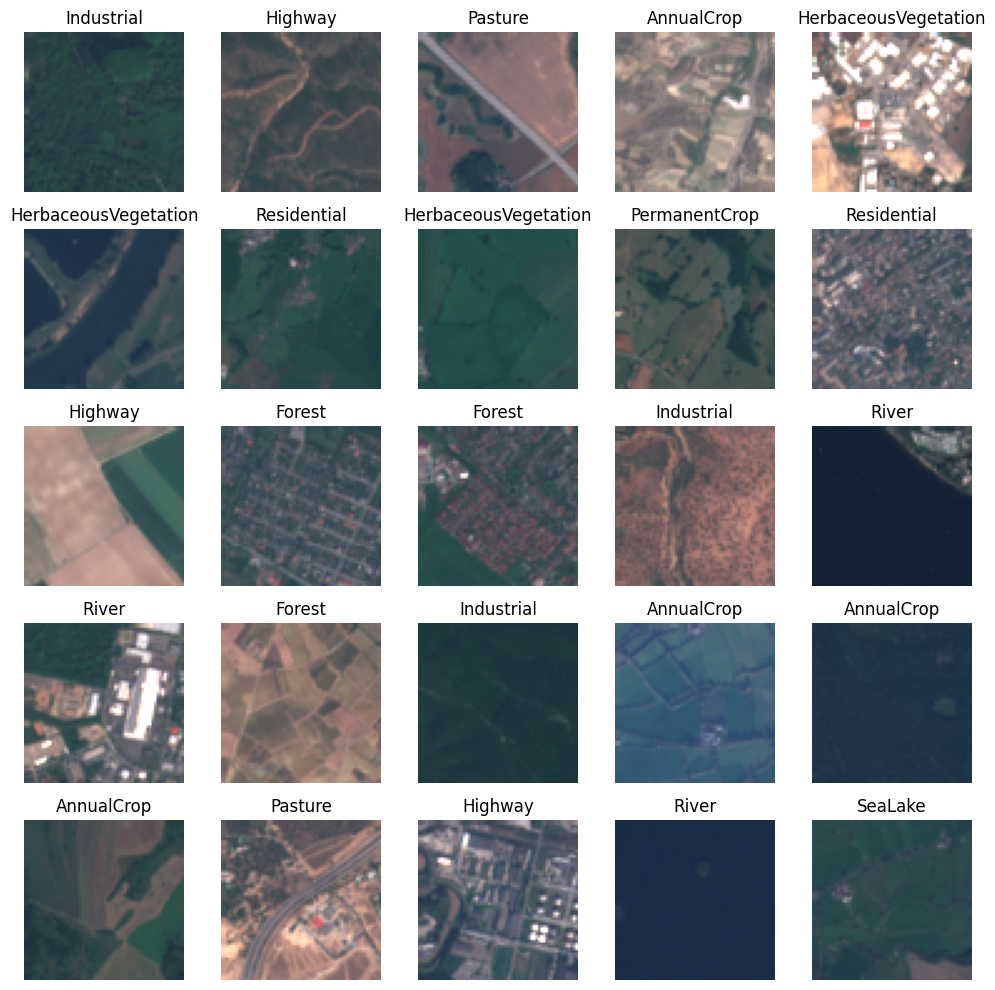

In [99]:
import matplotlib.pyplot as plt

# extract a batch of samples (you can also access val_dataloader or test_dataloader for the other splits)

batch = next(iter(ds.train_dataloader()))
imgs, labels = batch['image'], batch['label']

fig = plt.figure(figsize=(10, 10))
for i, (img, label) in enumerate(zip(imgs, labels)):
    ax = plt.subplot(5, 5, i + 1)
    ax.imshow((img[(3,2,1),...].permute(1,2,0) / 3000).clip(0,1))
    ax.set_title(ds.classes[label.item()])
    ax.axis('off')
plt.tight_layout()
plt.show()

You can now use the `Dataset` object to train your model, like we do in [this example notebook](./eurosat_advanced.ipynb)